In [132]:
%matplotlib inline
import sys
sys.path.insert(1,'../Utilities')
# notebook
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import pandas as pd
import networkx as nx
from math import sin, cos, sqrt, atan2, radians,log,log10
import json
from data import listedEiggHotels
from utils import *
from data import *
import seaborn as sns
sns.set_style("darkgrid")

#make the graphs bigger
pylab.rcParams['figure.figsize'] = (32.0, 24.0)
pylab.rcParams['font.size'] = 24

In [135]:
formatting = "Start date year"
def getUniqueSpeciesUpToYear(df, year):
    df = df[df[formatting] <= year]
    species = df['Scientific name']
    return len(Counter(species))


def getUniqueObserversUpToYear(df, year):
    df = df[df[formatting] <= year]
    species = df['Recorder']
    return len(Counter(species))

def getUniqueAnimalsPerYear(df):
    return range(1890,2020)
    return sorted([x[0] for x in list(Counter(df[formatting]).items())])

def getCumulativeBiodiversity(df): # == number of total discovered species by year
    df = df.dropna(subset=[formatting])
    uniqueYears = getUniqueAnimalsPerYear(df)
    plottableData = [[str(year),getUniqueSpeciesUpToYear(df,year)] for year in uniqueYears]
    xs = [x[0] for x in plottableData]
    ys = [x[1] for x in plottableData]
    #plotChart(xs,ys)
    return xs, ys

def plotNumObservationsByYear(df):
    df = df.dropna(subset=[formatting])
    df = df[formatting]
    df = list(df)
    df = Counter(df)
#     print(df)
    x = getUniqueAnimalsPerYear("")
    rt = []
    for item in x:
        if item in df:
            rt.append(df[item])
        else:
            rt.append(0)
#     print(rt)
    return x, rt

def getCumulativeObservers(df): # == number of total discovered species by year
    df = df.dropna(subset=[formatting])
    df = df.dropna(subset=['Recorder'])
    uniqueYears = getUniqueAnimalsPerYear(df)
    plottableData = [[str(year),getUniqueObserversUpToYear(df,year)] for year in uniqueYears]
    xs = [x[0] for x in plottableData]
    ys = [x[1] for x in plottableData]
    return xs, ys
    #plotChart(xs,ys)
    
def getUniqueAnimalsPerYearToPlotManually(df):
    df = df.dropna(subset=[formatting])
    uniqueYears = getUniqueAnimalsPerYear(df)
    plottableData = [[str(year),getUniqueSpeciesUpToYear(df,year)] for year in uniqueYears]
    xs = [x[0] for x in plottableData]
    ys = [x[1] for x in plottableData]
    return xs,ys

def getCumulativeObs(df): # == number of total discovered species by year
    df = df.dropna(subset=[formatting])
    uniqueYears = getUniqueAnimalsPerYear(df)
    plottableData = [[str(year),len(df[df[formatting] <= year])] for year in uniqueYears]
    xs = [x[0] for x in plottableData]
    ys = [x[1] for x in plottableData]
    #plotChart(xs,ys)
    return xs, ys


In [21]:
observationsOnEigg = eiggRawData()
observationsOnSkye = skyeRawData()
observationsOnRum = rumRawData()
observationsOnMuck = muckRawData()

C:\Users\davie\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: DtypeWarning: Columns (9,22) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\davie\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: DtypeWarning: Columns (55) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\davie\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: DtypeWarning: Columns (24,30,55) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


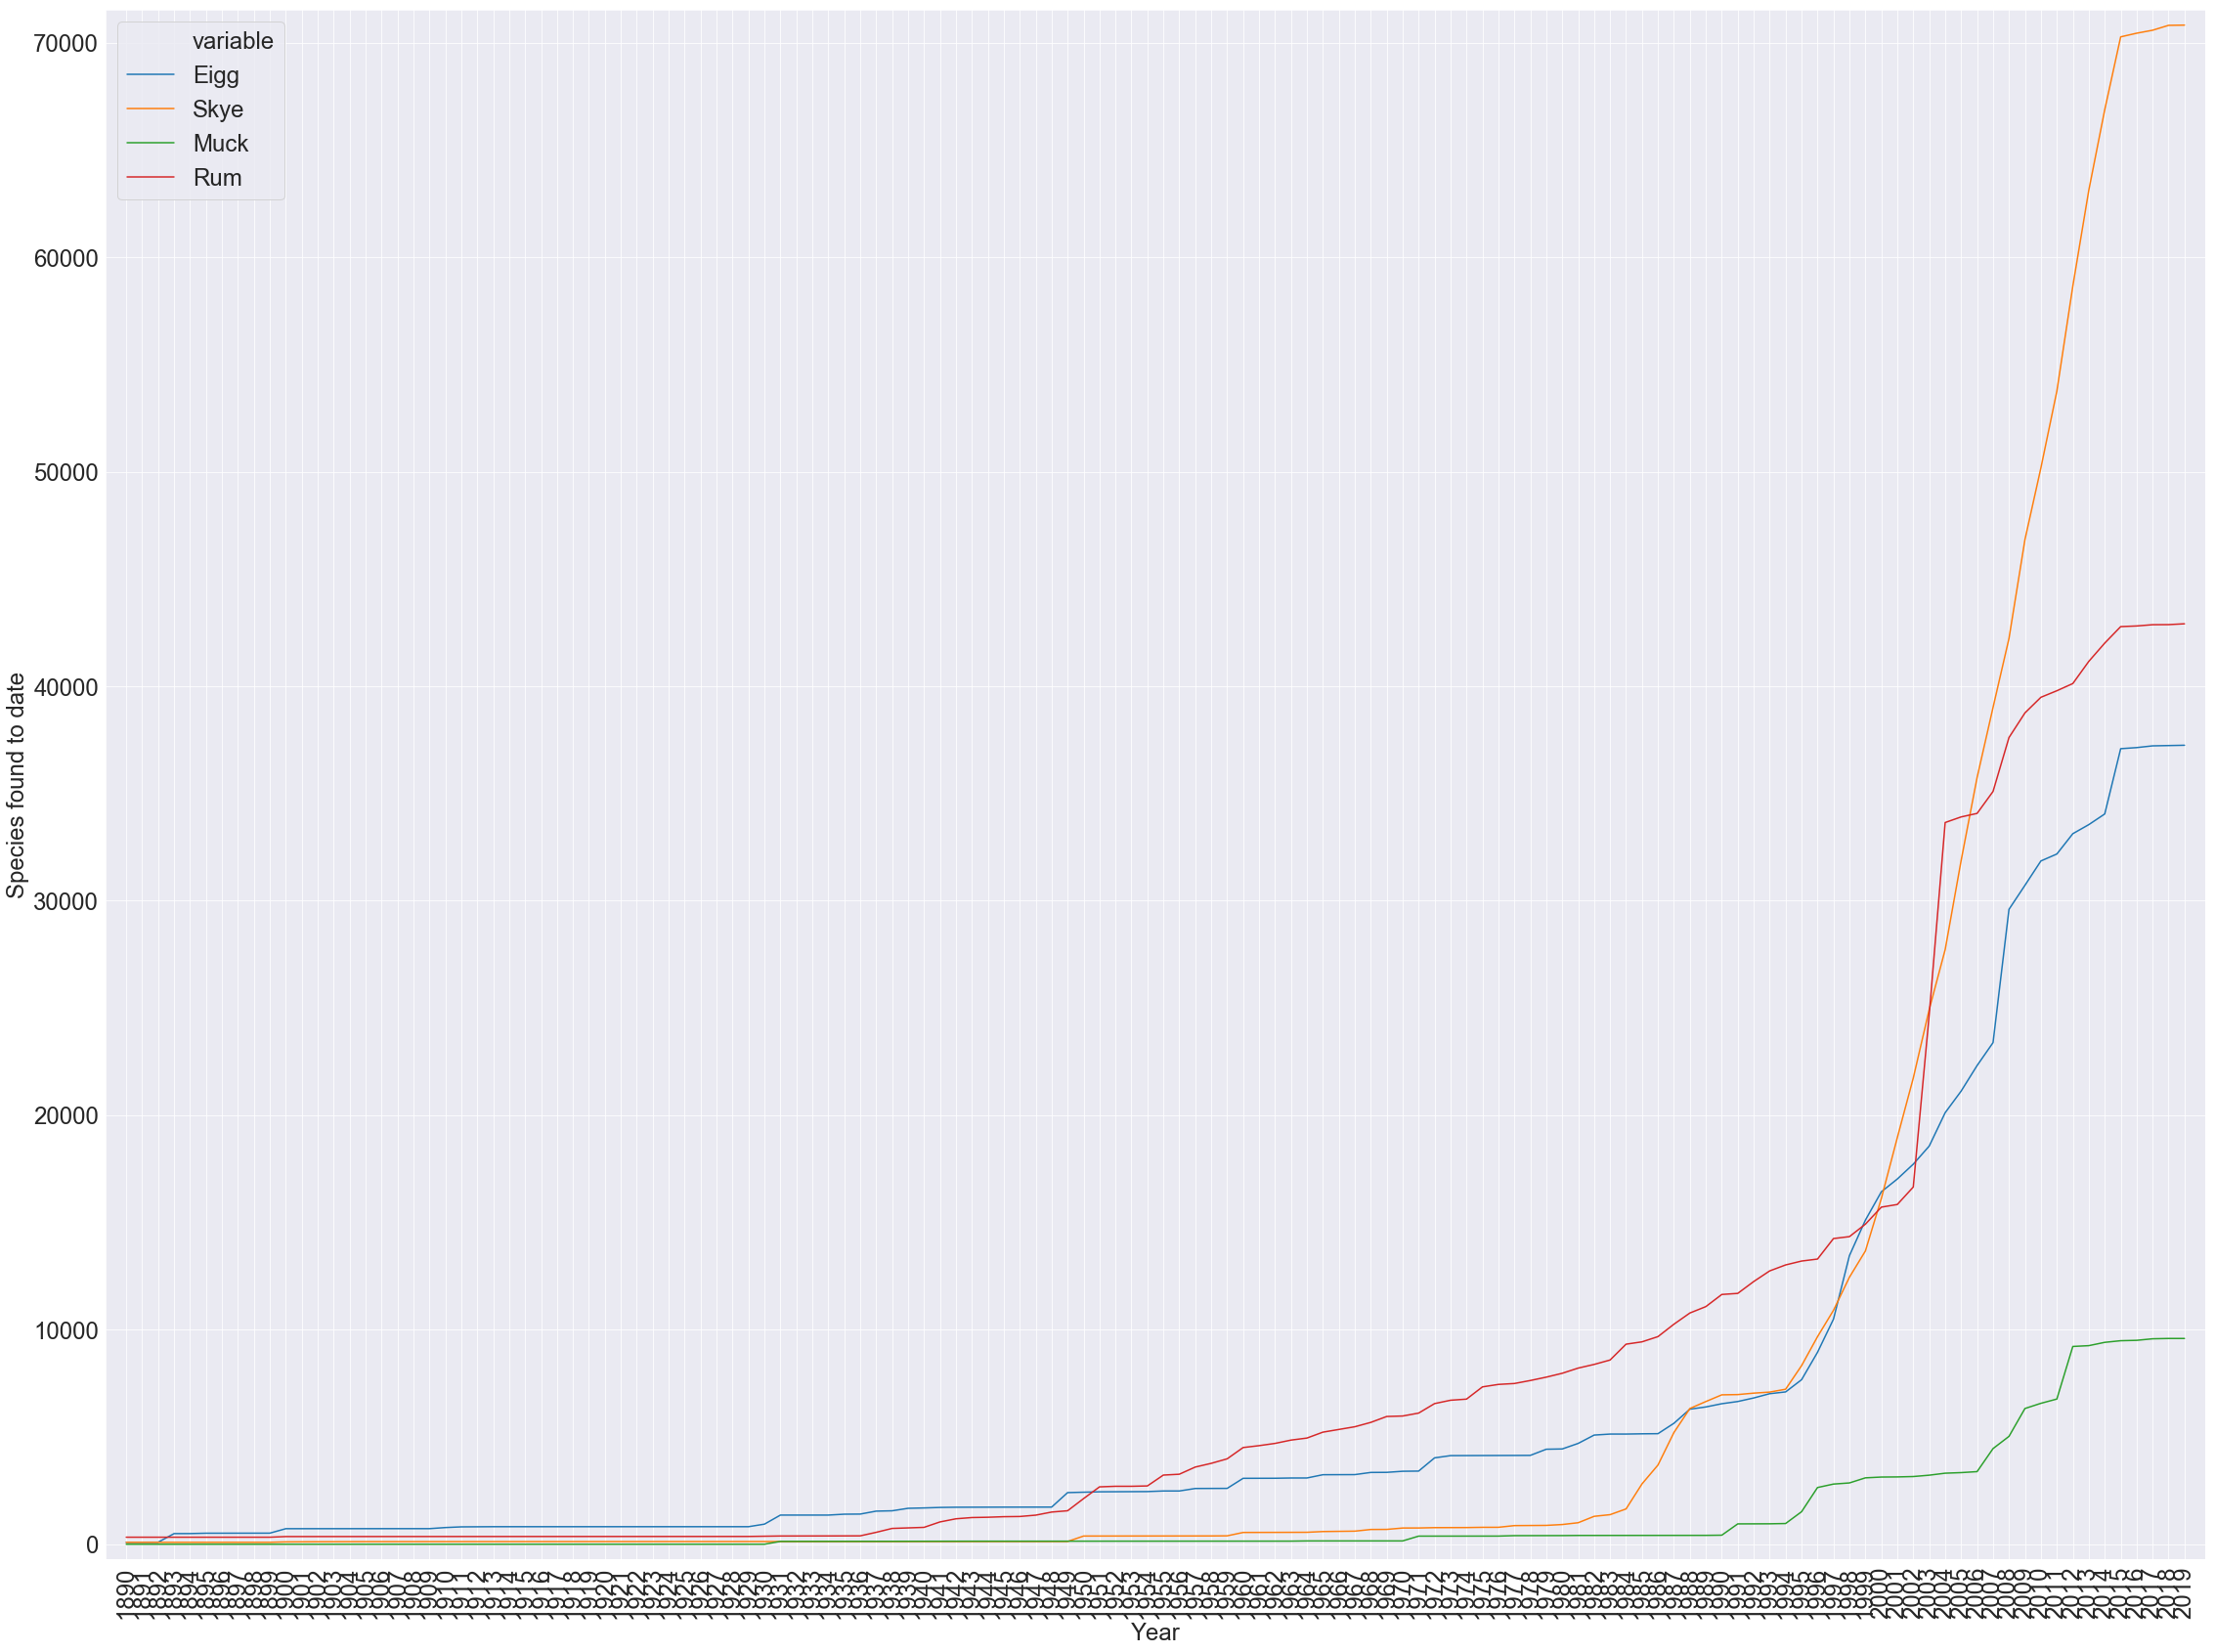

In [140]:
johnChester = observationsOnEigg[observationsOnEigg['Recorder'].str.lower()=="john chester"]
xs,yEigg = getCumulativeObs(observationsOnEigg)
xs,yMuck = getCumulativeObs(observationsOnMuck)
xs,yRum = getCumulativeObs(observationsOnRum)
xs,ySkye = getCumulativeObs(observationsOnSkye)
# xs,yJohn = getCumulativeBiodiversity(heroJohnChester)
# xs,yJohn2 = getCumulativeBiodiversity(johnChester)
years = list(getUniqueAnimalsPerYear(""))
data_preproc = pd.DataFrame({
    'Year': years, 
    'Eigg': yEigg,
    'Skye': ySkye,
    'Muck': yMuck,
    'Rum': yRum})

sns.set_style("darkgrid")
sns.lineplot(x='Year', y='value', hue='variable', 
             data=pd.melt(data_preproc, ['Year']))
plt.xticks(years, rotation='vertical')
# yLabels = np.arange(0, 3500, step=100)
# plt.yticks(yLabels)
plt.margins(0.01)
plt.tight_layout()
plt.xlabel("Year")
plt.ylabel("Species found to date")
plt.show()

# Eigg's spike at 1894

In [49]:
df = pd.read_csv("C:/Users/davie/Desktop/Masters/Dissertation/Code/DissertationCode/Eigg/IslandDatasets/eigg.csv")
df = df.dropna(subset=['Start date year'])
df = df[df["Start date year"]<1895]
df = df[df["Start date year"]>1890]

only = set(df['Dataset ID'].values.tolist())
dataSetIds = list(map(lambda x: (x, len(df[df['Dataset ID']==x])),list(only)))

only = set(df['Recorder'].values.tolist())
recorderNames = list(map(lambda x: (x, len(df[df['Recorder']==x])),list(only)))

dataSetIds, recorderNames

C:\Users\davie\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (9,22) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


([('dr654', 2), ('dr665', 1), ('dr655', 402), ('dr677', 1), ('dr676', 1)],
 [(nan, 0),
  ('Unknown', 1),
  ('S.M. McVicar', 2),
  ('E.J. McMurtrie', 1),
  ('S.M. Macvicar', 3),
  ('J. McMartin', 1),
  ('S.M. MacVicar', 398)])

Ok so that one guy contributed to Eigg. Why?

Well he was writing a book- published it, take a look here:
https://books.google.co.uk/books?id=B8nrMJRKG60C&pg=PA302&lpg=PA302&dq=macvicar+flora+of+eigg+tiree&source=bl&ots=DadVQG0MM4&sig=ACfU3U27Uf-w93OrGMDUDtppSpZ0TkMRSw&hl=en&sa=X&ved=2ahUKEwik8Ym7lvXoAhVkmVwKHTH7DwcQ6AEwAHoECAsQKQ#v=onepage&q=macvicar%20flora%20of%20eigg%20tiree&f=false

"On the flora of Eigg"- but he also did other islands like Tiree.

It's not as if the other islands weren't involved- Skye had a guy also record all of it's plants even earlier in 1873 https://archiveshub.jisc.ac.uk/search/archives/8f7a142a-842f-3d42-ae35-71298c59b080?component=68e94a63-a0d4-32ae-8ae2-2980d2f591c6

Marmaduke Alexander Lawson (1840-96) was Sherardian Professor of Botany and Sibthorpian Professor of Rural Economy at Oxford.

They just weren't recorded into NBN. But why?

Lawson's paper is physical- and held at the University of Oxford, and needing a permit to access.

The other dude (MacVicar) published handbooks- hence theyre a lot more ubiquitous, and therefore, are available to be typed into NBN https://rbg-web2.rbge.org.uk/bbs/Learning/Bryohistory/History%20of%20British%20Bryology.pdf

Rum

([('dr789', 105), ('dr965', 11), ('dr655', 215), ('dr654', 191)],
 [(nan, 0),
  ('M.McC. Webster', 384),
  ('J.W. Heslop-Harrison', 11),
  ('P.H. Davis', 2),
  ('P.F. Yeo', 2),
  ('J.A. Cole', 14),
  ('M.M. Webster', 3)])
  
 Eigg 
 
 ([('dr1817', 1), ('dr655', 417), ('dr654', 6)],
 [(nan, 0),
  ('WF Miller', 3),
  ('W.F. Millar', 1),
  ('S.M. McVicar', 4),
  ('S.M. MacVicar', 400),
  ('S.M. Macvicar', 9),
  ('W.F. Miller', 1),
  ('MacVicar, S.M.', 1)])
  
  Muck
  ([('dr655', 133),
  ('dr654', 1),
  ('dr731', 3),
  ('dr665', 1),
  ('dr677', 1),
  ('dr789', 3)],
 [(nan, 0),
  ('J. Heslop-Harrison', 3),
  ('T. Warwick', 2),
  ('J.W. Heslop-Harrison', 1),
  ('Harrison et. al. J.W.H', 133)])
  
  Skye
  ([('dr713', 1),
  ('dr655', 58),
  ('dr1385', 1),
  ('dr1372', 75),
  ('dr1309', 1),
  ('dr741', 24),
  ('dr743', 8),
  ('dr339', 2),
  ('dr859', 12)],
 [(nan, 0),
  ('Whitehouse, H.L.K.', 5),
  ('Lynch, W.', 4),
  ('SNH Staff', 2),
  ('Everyweek', 1),
  ('BDS (no region specified)', 1),
  ('Withheld', 1),
  ('Everyweek Survey', 2),
  ('Stirling, A.McG.', 2),
  ('Placido, C.', 1)])

# Intersection point with Muck in 1949

In [54]:
df = pd.read_csv("C:/Users/davie/Desktop/Masters/Dissertation/Code/DissertationCode/Eigg/IslandDatasets/eigg.csv")
df = df.dropna(subset=['Start date year'])
df = df[df["Start date year"]<1932]
df = df[df["Start date year"]>1926]

only = set(df['Dataset ID'].values.tolist())
dataSetIds = list(map(lambda x: (x, len(df[df['Dataset ID']==x])),list(only)))

only = set(df['Recorder'].values.tolist())
recorderNames = list(map(lambda x: (x, len(df[df['Recorder']==x])),list(only)))

[recorderNames[0]]

[('Harrison et. al. J.W.H', 421)]

In [55]:
df = pd.read_csv("C:/Users/davie/Desktop/Masters/Dissertation/Code/DissertationCode/Eigg/IslandDatasets/muck.csv")
df = df.dropna(subset=['Start date year'])
df = df[df["Start date year"]<1932]
df = df[df["Start date year"]>1926]

only = set(df['Dataset ID'].values.tolist())
dataSetIds = list(map(lambda x: (x, len(df[df['Dataset ID']==x])),list(only)))

only = set(df['Recorder'].values.tolist())
recorderNames = list(map(lambda x: (x, len(df[df['Recorder']==x])),list(only)))

recorderNames

[('Harrison et. al. J.W.H', 133)]

# Intersections of all (but muck) on 59-60

In [57]:
df = pd.read_csv("C:/Users/davie/Desktop/Masters/Dissertation/Code/DissertationCode/Eigg/IslandDatasets/skye.csv")
df = df.dropna(subset=['Start date year'])
df = df[df["Start date year"]>1957]
df = df[df["Start date year"]<1962]

only = set(df['Recorder'].values.tolist())
recorderNamesSkye = list(map(lambda x: (x, len(df[df['Recorder']==x])),list(only)))

df = pd.read_csv("C:/Users/davie/Desktop/Masters/Dissertation/Code/DissertationCode/Eigg/IslandDatasets/eigg.csv")
df = df.dropna(subset=['Start date year'])
df = df[df["Start date year"]>1957]
df = df[df["Start date year"]<1962]

only = set(df['Recorder'].values.tolist())
recorderNamesEigg = list(map(lambda x: (x, len(df[df['Recorder']==x])),list(only)))

df = pd.read_csv("C:/Users/davie/Desktop/Masters/Dissertation/Code/DissertationCode/Eigg/IslandDatasets/rum.csv")
df = df.dropna(subset=['Start date year'])
df = df[df["Start date year"]>1957]
df = df[df["Start date year"]<1962]

only = set(df['Recorder'].values.tolist())
recorderNamesRum = list(map(lambda x: (x, len(df[df['Recorder']==x])),list(only)))

# set([x[0] for x in dataSetIdsSkye]).intersection(set([x[0] for x in dataSetIdsEigg]))
recorderNamesEigg, recorderNamesSkye, recorderNamesRum

([(nan, 0),
  ('E.F. Ferrier', 1),
  ('Clive Jermy', 1),
  ('Turner, P.F.', 2),
  ('A.C. Jermy', 1),
  ('Anon @ British Lichen Society', 427),
  ('M.G. Collett', 3),
  ('Unknown-to-HBRG', 2)],
 [(nan, 0),
  ('Creed, E.R.', 2),
  ('Simpson, B.', 2),
  ('Harper, G.H.', 1),
  ('Gibson, Dr.J.A.', 20),
  ('Anon @ British Lichen Society', 133)],
 [(nan, 0),
  ('J. Brownlie', 2),
  ('Bill Steel', 37),
  ('FBA staff & associates', 1),
  ('P. Wormell', 88),
  ('Peter Wormell', 29),
  ('Skidmore, P.', 1),
  ('Anon', 2),
  ('Ratcliffe, D.A.', 32),
  ('Derek Almey Ratcliffe', 2),
  ('Clive Jermy', 1),
  ('Dennis, R.W.', 1),
  ('Anon @ British Lichen Society', 202),
  ('Welch, Dr R.C. (Colin)', 2),
  ('Nature Conservancy', 1),
  ('no data', 1),
  ('J.C. Brownlie', 1),
  ('R.W.G. Dennis', 2),
  ('Corley, M.F.V.', 1),
  ('B. Nevinson', 1),
  ('Lodge, E.', 1),
  ('Wormell, P.', 1),
  ('Brindle, A.', 95),
  ('A.C. Jermy', 13),
  ('Richard Dennis', 1),
  ('Unknown-to-HBRG', 9),
  ('R.E.C. Ferreira', 2),

# Intersection with Skye

In [64]:
df = pd.read_csv("C:/Users/davie/Desktop/Masters/Dissertation/Code/DissertationCode/Eigg/IslandDatasets/eigg.csv")
df = df.dropna(subset=['Start date year'])
df = df[df["Start date year"]<1990]
df = df[df["Start date year"]>1983]

only = set(df['Dataset ID'].values.tolist())
recorderNamesEigg = list(map(lambda x: (x, len(df[df['Dataset ID']==x])),list(only)))

df = pd.read_csv("C:/Users/davie/Desktop/Masters/Dissertation/Code/DissertationCode/Eigg/IslandDatasets/skye.csv")
df = df.dropna(subset=['Start date year'])
df = df[df["Start date year"]<1990]
df = df[df["Start date year"]>1983]

only = set(df['Dataset ID'].values.tolist())
recorderNamesSkye = list(map(lambda x: (x, len(df[df['Dataset ID']==x])),list(only)))

sorted([x for x in recorderNamesEigg if x[1] > 100]), sorted([x for x in recorderNamesSkye if x[1] > 100])

([('dr1156', 314), ('dr1206', 145), ('dr655', 487), ('dr883', 122)],
 [('dr1156', 264), ('dr1231', 946), ('dr654', 3014), ('dr655', 720)])

# BTO 2011

In [83]:
df = pd.read_csv("C:/Users/davie/Desktop/Masters/Dissertation/Code/DissertationCode/Eigg/IslandDatasets/eigg.csv")
df = df.dropna(subset=['Start date year'])
df = df[df["Start date year"]<2012]
df = df[df["Start date year"]>2006]

only = set(df['Recorder'].values.tolist())
recorderNamesEigg = list(map(lambda x: (x, len(df[df['Recorder']==x])),list(only)))

df = pd.read_csv("C:/Users/davie/Desktop/Masters/Dissertation/Code/DissertationCode/Eigg/IslandDatasets/skye.csv")
df = df.dropna(subset=['Start date year'])
df = df[df["Start date year"]<2012]
df = df[df["Start date year"]>2006]

only = set(df['Recorder'].values.tolist())
recorderNamesSkye = list(map(lambda x: (x, len(df[df['Recorder']==x])),list(only)))

df = pd.read_csv("C:/Users/davie/Desktop/Masters/Dissertation/Code/DissertationCode/Eigg/IslandDatasets/rum.csv")
df = df.dropna(subset=['Start date year'])
df = df[df["Start date year"]<2012]
df = df[df["Start date year"]>2006]

only = set(df['Recorder'].values.tolist())
recorderNamesRum = list(map(lambda x: (x, len(df[df['Recorder']==x])),list(only)))

df = pd.read_csv("C:/Users/davie/Desktop/Masters/Dissertation/Code/DissertationCode/Eigg/IslandDatasets/muck.csv")
df = df.dropna(subset=['Start date year'])
df = df[df["Start date year"]<2012]
df = df[df["Start date year"]>2006]

only = set(df['Recorder'].values.tolist())
recorderNamesMuck = list(map(lambda x: (x, len(df[df['Recorder']==x])),list(only)))


print("Eigg")
print(sorted([x for x in recorderNamesEigg if x[1] > 200],key=lambda x: x[1])[::-1])
print("Rum")
print(sorted([x for x in recorderNamesRum if x[1] > 200],key=lambda x: x[1])[::-1])
print("Skye")
print(sorted([x for x in recorderNamesSkye if x[1] > 200],key=lambda x: x[1])[::-1])
print("Muck")
print(sorted([x for x in recorderNamesMuck if x[1] > 200],key=lambda x: x[1])[::-1])

Eigg
[('John Chester', 1929), ('Stephen Bungard|Jim McIntosh', 681), ('S.J. Bungard|C. Cheffings|L. Farrell|J. McIntosh|G. Moss|R. Scott', 543), ('Chris Cheffings|Guy Moss', 462), ('Stephen Bungard', 427), ('Stephen Bungard|Lynne Farrell', 390), ('Chris Cheffings|Guy Moss|Lynne Farrell|Ro Scott', 312), ('C. Cheffings|J. McIntosh|G. Moss|R. Scott', 299), ('Lynne Farrell|Ro Scott', 299), ('Stephen Bungard|Lynne Farrell|Jim McIntosh', 294)]
Rum
[('Stephen Bungard', 380), ('Jonathan Willet', 209)]
Skye
[('A.B.G. Averis', 280), ('Kim McEwen', 236)]
Muck
[('Stephen Bungard', 1340)]


# 1997

In [131]:
use = "Dataset ID"
f = 2000
t = 1995

df = pd.read_csv("C:/Users/davie/Desktop/Masters/Dissertation/Code/DissertationCode/Eigg/IslandDatasets/eigg.csv")
df = df.dropna(subset=['Start date year'])
df = df[df["Start date year"]<f]
df = df[df["Start date year"]>t]

only = set(df[use].values.tolist())
recorderNamesEigg = list(map(lambda x: (x, len(df[df[use]==x])),list(only)))

df = pd.read_csv("C:/Users/davie/Desktop/Masters/Dissertation/Code/DissertationCode/Eigg/IslandDatasets/skye.csv")
df = df.dropna(subset=['Start date year'])
df = df[df["Start date year"]<f]
df = df[df["Start date year"]>t]

only = set(df[use].values.tolist())
recorderNamesSkye = list(map(lambda x: (x, len(df[df[use]==x])),list(only)))

df = pd.read_csv("C:/Users/davie/Desktop/Masters/Dissertation/Code/DissertationCode/Eigg/IslandDatasets/rum.csv")
df = df.dropna(subset=['Start date year'])
df = df[df["Start date year"]<f]
df = df[df["Start date year"]>t]

only = set(df[use].values.tolist())
recorderNamesRum = list(map(lambda x: (x, len(df[df[use]==x])),list(only)))

df = pd.read_csv("C:/Users/davie/Desktop/Masters/Dissertation/Code/DissertationCode/Eigg/IslandDatasets/muck.csv")
df = df.dropna(subset=['Start date year'])
df = df[df["Start date year"]<f]
df = df[df["Start date year"]>t]

only = set(df[use].values.tolist())
recorderNamesMuck = list(map(lambda x: (x, len(df[df[use]==x])),list(only)))


print("Eigg")
print(sorted([x for x in recorderNamesEigg if x[1] > 200],key=lambda x: x[1])[::-1])
print("Rum")
print(sorted([x for x in recorderNamesRum if x[1] > 200],key=lambda x: x[1])[::-1])
print("Skye")
print(sorted([x for x in recorderNamesSkye if x[1] > 200],key=lambda x: x[1])[::-1])
print("Muck")
print(sorted([x for x in recorderNamesMuck if x[1] > 200],key=lambda x: x[1])[::-1])

C:\Users\davie\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (9,22) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\davie\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (24,30,55) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Eigg
[('dr655', 2449), ('dr749', 1943), ('dr859', 1042), ('dr765', 1016), ('dr1206', 325), ('dr481', 243)]
Rum
[('dr655', 1446)]
Skye
[('dr528', 4266), ('dr654', 552), ('dr481', 315)]
Muck
[('dr655', 1308)]


In [130]:
f = 2000
t = 1996
df = pd.read_csv("C:/Users/davie/Desktop/Masters/Dissertation/Code/DissertationCode/Eigg/IslandDatasets/skye.csv")
df = df.dropna(subset=['Start date year'])
df = df[df["Start date year"]<f]
df = df[df["Start date year"]>t]
df = df[df["Dataset ID"]=="dr528"]
print(len(df))
use = "Recorder"
only = set(df[use].values.tolist())

recorderNamesSkye = list(map(lambda x: (x, len(df[df[use]==x])),list(only)))
recorderNamesSkye

2209


[(nan, 0)]

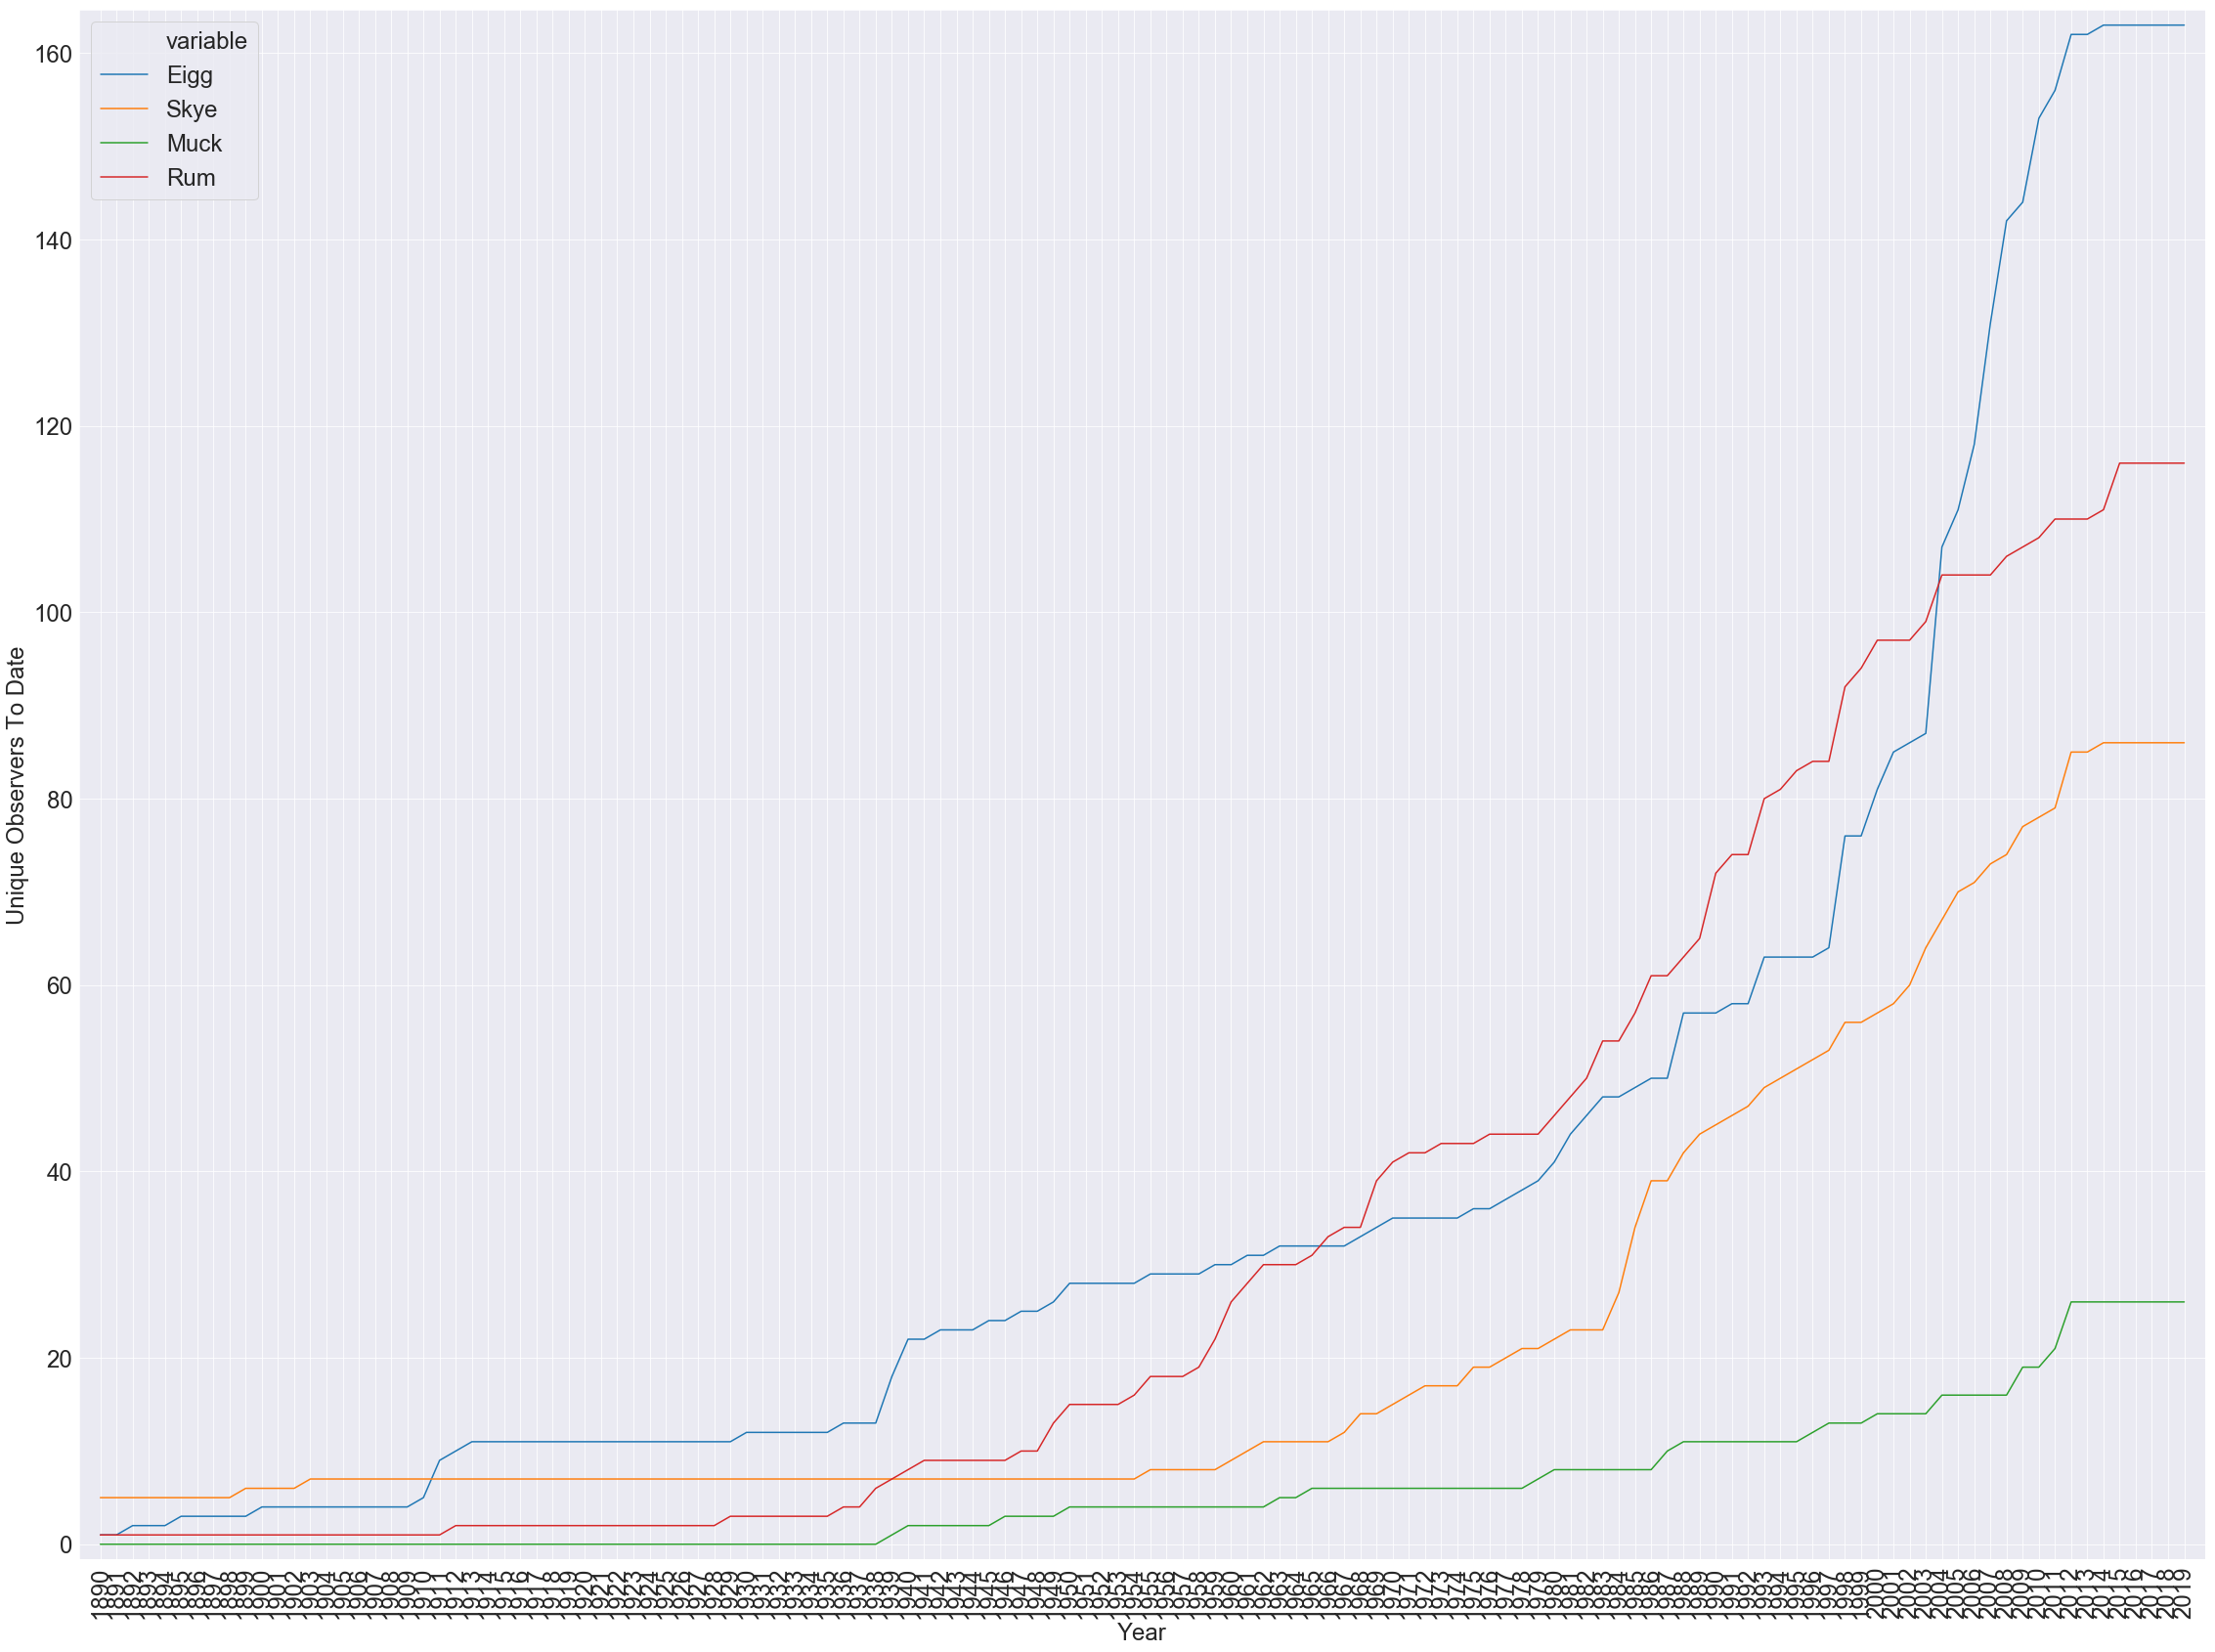

In [49]:
xs,yEigg = getCumulativeObservers(observationsOnEigg)
xs,yMuck = getCumulativeObservers(observationsOnMuck)
xs,yRum = getCumulativeObservers(observationsOnRum)
xs,ySkye = getCumulativeObservers(observationsOnSkye)

years = list(getUniqueAnimalsPerYear(""))
data_preproc = pd.DataFrame({
    'Year': years, 
    'Eigg': yEigg,
    'Skye': ySkye,
    'Muck': yMuck,
    'Rum': yRum})

sns.set_style("darkgrid")
sns.lineplot(x='Year', y='value', hue='variable', 
             data=pd.melt(data_preproc, ['Year']))
plt.xticks(years, rotation='vertical')
plt.margins(0.01)
plt.tight_layout()
plt.xlabel("Year")
plt.ylabel("Unique Observers To Date")
plt.show()

# By End Date

In [123]:
use = "Dataset ID"
f = 2000
t = 1995

df = pd.read_csv("C:/Users/davie/Desktop/Masters/Dissertation/Code/DissertationCode/Eigg/IslandDatasets/eigg.csv")
df = df.dropna(subset=['End date year'])
df = df[df["End date year"]<f]
df = df[df["End date year"]>t]

only = set(df[use].values.tolist())
recorderNamesEigg = list(map(lambda x: (x, len(df[df[use]==x])),list(only)))

df = pd.read_csv("C:/Users/davie/Desktop/Masters/Dissertation/Code/DissertationCode/Eigg/IslandDatasets/skye.csv")
df = df.dropna(subset=['End date year'])
df = df[df["End date year"]<f]
df = df[df["End date year"]>t]

only = set(df[use].values.tolist())
recorderNamesSkye = list(map(lambda x: (x, len(df[df[use]==x])),list(only)))

print("Eigg")
print(sorted([x for x in recorderNamesEigg if x[1] > 200],key=lambda x: x[1])[::-1])
print("Skye")
print(sorted([x for x in recorderNamesSkye if x[1] > 200],key=lambda x: x[1])[::-1])

Eigg
[('dr749', 1943), ('dr655', 497), ('dr481', 243), ('dr765', 218)]
Skye
[('dr655', 681), ('dr481', 315)]
